<h1 style = "text-align:center">PARSING A PDF</h1> 

<h2>Welcome to my new project, where I’ll be working on extracting and using data from a PDF.</h2>

#### For this project, I’ll be using the pdfplumber library along with the financial statements of Montpellier Hérault Rugby ("https://www.pappers.fr/entreprise/mhr-montpellier-herault-rugby-433839024")

#### The goal is to extract the expenses and revenues for 2023 and 2024, and then compute the net result for each financial year.


In [1]:
%pip install pandas
%pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import re
import pdfplumber
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pdf = pdfplumber.open("comptes_sociaux_2024.pdf")
page = pdf.pages[5]
text = page.extract_text()

for line in text.split("\n"):
    print(line)

Page :
Compte de Résultat
RESULTAT D'EXPLOITATION
Bénéfice attribué ou perte transférée
Perte supportée ou bénéfice transféré
De participations (3)
D'autres valeurs mobilières et créances d'actif immobilisé (3)
Autres intérêts et produits assimilés (3)
Différences positives de change
Produits nets sur cessions de valeurs mobilières de placement
Intérêts et charges assimilées (4)
Différences négatives de change
Charges nettes sur cessions de valeurs mobilières de placement
RESULTAT FINANCIER
RESULTAT COURANT AVANT IMPOTS
RESULTAT EXCEPTIONNEL
STIUDORP
STIUDORP
SLENNOITPECXE
Total des produits financiers
.arépO
SEGRAHC
.mmoc
SREICNANIF
SEREICNANIF
Total des charges financières
Sur opérations de gestion
Sur opérations en capital
Total des produits exceptionnels
Total des charges exceptionnelles
SEGRAHC
SELLENNOITPECXE
AXIOME AEC S.A. MONTPELLIER HERAULT RUGBY 4
2/2
Etat exprimé en euros 30/06/2024 30/06/2023
(10 138 371) (5 942 050)
135 115
Reprises sur provisions et dépréciations et tran

#### I then use a regular expression to filter and extract only the lines that include "Produits" (Revenues) and "Charges" (Expenses) data.

In [4]:
desc_re = re.compile(r"([A-Z].+) (\d{0,9} \d{0,9} \d{0,9}) (\d{0,9} \d{0,9} \d{0,9})")

resultat = namedtuple("Resultat", "Concept Year24 Year23")
items = []
for line in text.split("\n"): 
    if desc_re.search(line):
        titre = desc_re.search(line).group(1)
        year24 = desc_re.search(line).group(2)
        year23 = desc_re.search(line).group(3)
        items.append(resultat(titre, year24, year23))

df = pd.DataFrame(items)
df

,Concept,Year24,Year23
0,TOTAL DES PRODUITS,34 927 408,31 954 658
1,TOTAL DES CHARGES,35 471 530,31 740 813


#### The data of the result above is a string.. If I want to sustract them to have the net result, I must convert them into integer

In [5]:
df['Year24'] = df['Year24'].astype(str).str.replace(' ', '').astype(int)
df['Year23'] = df['Year23'].astype(str).str.replace(' ', '').astype(int)
df.head()


,Concept,Year24,Year23
0,TOTAL DES PRODUITS,34927408,31954658
1,TOTAL DES CHARGES,35471530,31740813


In [6]:
# Sélection des lignes "produits" et "charges"
produits = df.loc[df['Concept'] == 'TOTAL DES PRODUITS'].iloc[0, 1:]  # Exclure la colonne Concept
charges = df.loc[df['Concept'] == 'TOTAL DES CHARGES'].iloc[0, 1:]

# Soustraction
resultat = produits - charges
resultat

Year24    -544122
Year23     213845
dtype: object

#### The result above is returned as a string. To perform a subtraction and calculate the financial year, I need to convert the values into integers.

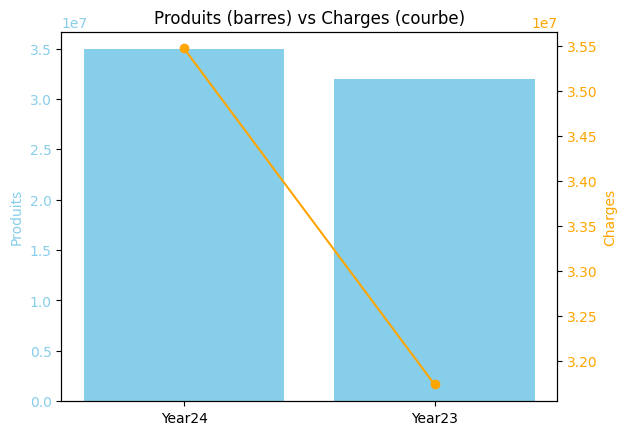

In [10]:
fig, ax1 = plt.subplots()
x = resultat.index

# Barres pour les produits
ax1.bar(x, produits.values.astype(float), color='skyblue', label='Produits')
ax1.set_ylabel('Produits', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Courbe pour les charges
ax2 = ax1.twinx()
ax2.plot(x, charges.values.astype(float), color='orange', marker='o', label='Charges')
ax2.set_ylabel('Charges', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Produits (barres) vs Charges (courbe)')
plt.show()



#### Finally the chart above shows that the increase in incomes isn't suficient to cover the increase in expenses 